## Introduction
We want to analyze the The effect of vitamin C on Toothe Growth of guinea pigs.

For the final project of the course "[Statiscal Inference](https://www.coursera.org/learn/statistical-inference)" 
from Coursera.


### ToothGrowth
Let's first load the data and review it.

In [2]:
options(warn = 0)
library(tidyverse)
library(datasets)
data(ToothGrowth)
df <- as_tibble(ToothGrowth)
levels(df$supp) <- c("Orange Juice", "Ascorbic Acid")
summary(df)

      len                   supp         dose      
 Min.   : 4.20   Orange Juice :30   Min.   :0.500  
 1st Qu.:13.07   Ascorbic Acid:30   1st Qu.:0.500  
 Median :19.25                      Median :1.000  
 Mean   :18.81                      Mean   :1.167  
 3rd Qu.:25.27                      3rd Qu.:2.000  
 Max.   :33.90                      Max.   :2.000  

So there are 60 observations of 3 variables:

- len: length of the tooth
- supp: type of supplement
- dose: dose of the supplement

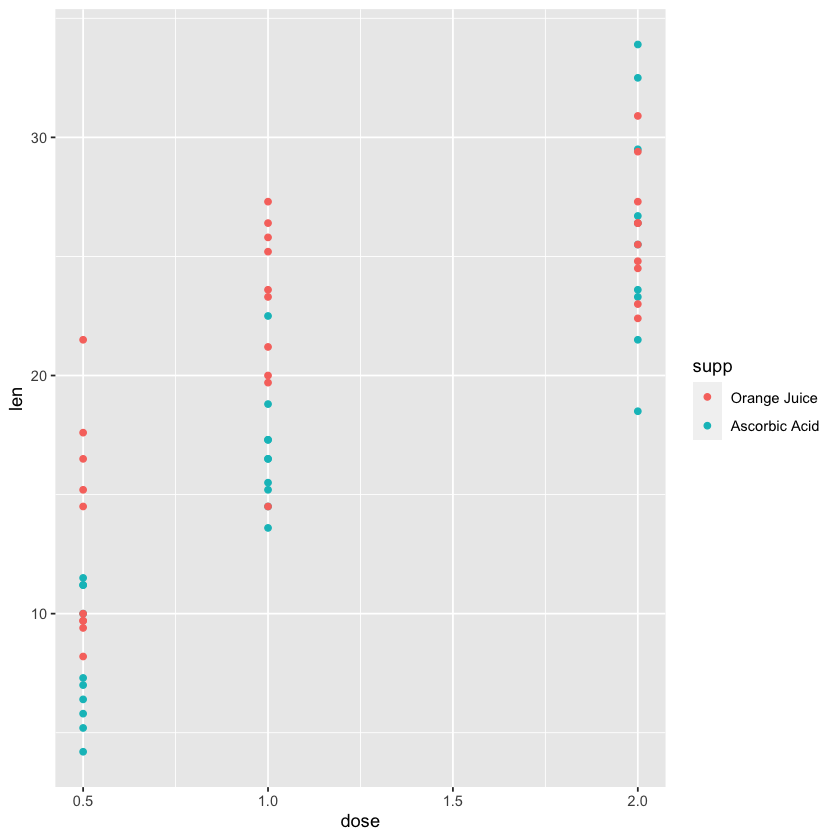

In [3]:
g <- ggplot(df) +
    aes(x = dose, y = len, color = supp) +
    geom_point()
g

According to the plot above, it's clear that as the dose increases, the length of the tooth increases.
Now I'm going to test two different hypothesis:

### Hypothesis 1
The "Orange Juice" and "Ascorbic Acid" have the same overall effect on the length of the tooth for all doses.

In [4]:
t.test(len ~ supp, data = df)


	Welch Two Sample t-test

data:  len by supp
t = 1.9153, df = 55.309, p-value = 0.06063
alternative hypothesis: true difference in means between group Orange Juice and group Ascorbic Acid is not equal to 0
95 percent confidence interval:
 -0.1710156  7.5710156
sample estimates:
 mean in group Orange Juice mean in group Ascorbic Acid 
                   20.66333                    16.96333 


Since the p-value is above 0.05, we fail to reject the null hypothesis. So we can say that the "Orange Juice" and "Ascorbic Acid", "may" have the same overall effect on the length of the tooth for all doses.

### Hypothesis 2

Now let's check the null hypothesis of the "Orange Juice" and "Ascorbic Acid" having the same effect on the length of the tooth for dose equal to 0.5.

In [5]:
t.test(len ~ supp, data = subset(df, dose == 0.5))


	Welch Two Sample t-test

data:  len by supp
t = 3.1697, df = 14.969, p-value = 0.006359
alternative hypothesis: true difference in means between group Orange Juice and group Ascorbic Acid is not equal to 0
95 percent confidence interval:
 1.719057 8.780943
sample estimates:
 mean in group Orange Juice mean in group Ascorbic Acid 
                      13.23                        7.98 


Because the p-value is below 0.05, we reject the null hypothesis. So we can say that the "Orange Juice" and "Ascorbic Acid", "do not" have the same effect on the length of the tooth for dose equal to 0.5 and the "Orange Juice" has a stronger effect.

Keep in mind we could draw these conclusion also by looking at this plot:

`geom_smooth()` using formula 'y ~ x'



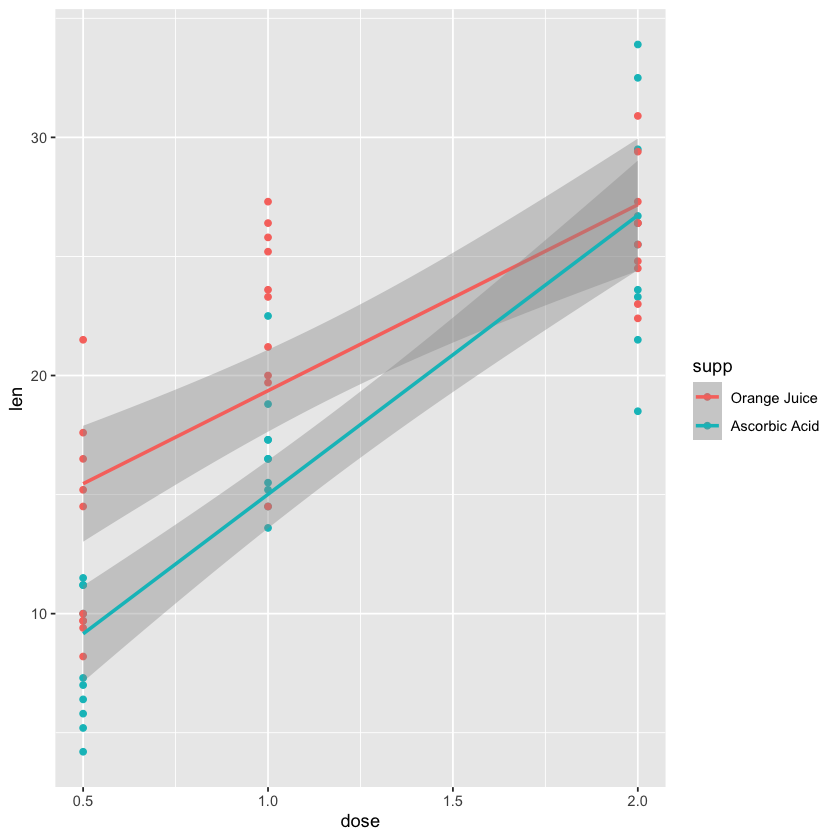

In [6]:
g +
    geom_smooth(method = lm, se = TRUE)

We can see there is no overlap between confidence intervals of the "Orange Juice" and "Ascorbic Acid" for dose equal to 0.5. And there is a strong overlap for dose equal to 2.